# OUTDATED, the examples moved to the manual
## See https://empymod.readthedocs.io/en/stable/examples

----

# Transform utilities within `empymod` for other modellers

This is an example how you can use the Fourier-transform tools implemented in `empymod` with other modellers. You could achieve the same for the Hankel transform.

`empymod` has various Fourier transforms implemented:
- Digital Linear Filters DLF (Sine/Cosine)
- Quadrature with Extrapolation QWE
- Logarithmic Fast Fourier Transform FFTLog
- Fast Fourier Transform FFT


For details of all the parameters see the `empymod`-docs or the function's docstrings.

In [1]:
import empymod
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Style adjustments
%matplotlib inline
plt.style.use('ggplot')

## Model and transform parameters

The model actually doesn't matter for our purpose, but we need some model to show how it works.

In [3]:
# Define model, a halfspace
model = {
    'src': [0, 0, 0.001],     # Source at origin, slightly below interface
    'rec': [6000, 0, 0.001],  # Receivers in-line, 0.5m below interface
    'depth': [0],             # Air interface
    'res': [2e14, 1],         # Resistivity: [air, half-space]
    'epermH': [0, 1],         # Set el. permittivity of air to 0 because of numerical noise
    'epermV': [0, 1],         # Set el. permittivity of air to 0 because of numerical noise
}

# Specify desired times
time = np.linspace(0.1, 30, 301)

# Desired time-domain signal (0: impulse; 1: step-on; -1: step-off)
signal = 1

# Get required frequencies to model this time-domain result
# => we later need `ft` and `ftarg` for the Fourier transform.
# => See the docstrings (e.g., empymod.model.dipole) for available transforms and their arguments.
time, freq, ft, ftarg = empymod.utils.check_time(time=time, signal=signal, ft='sin', ftarg={'pts_per_dec'}, verb=3)

   time        [s] :  0.1 - 30 : 301  [min-max; #]
   Fourier         :  DLF (Sine-Filter)
     > Filter      :  Key 201 CosSin (2012)
     > DLF type    :  Lagged Convolution


## Frequency-domain calculation

**=> Here we calculate the frequency-domain result with `empymod`, but you could calculate it with any other modeller.**

In [4]:
fresp = empymod.dipole(freqtime=freq, **model)


:: empymod END; runtime = 0:00:00.056908 :: 1 kernel call(s)



### Plot frequency-domain result

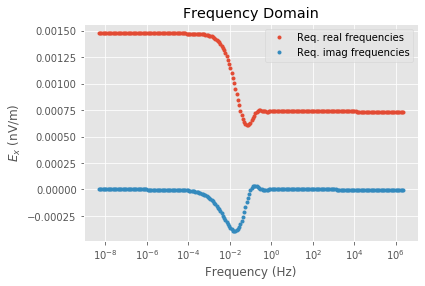

In [5]:
plt.figure()

plt.title('Frequency Domain')
plt.plot(freq, 1e9*fresp.real, 'C0.', label='Req. real frequencies')
plt.plot(freq, 1e9*fresp.imag, 'C1.', label='Req. imag frequencies')
plt.legend()
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('$E_x$ (nV/m)')

plt.show()

## Fourier transform

In [6]:
# Calculate corresponding time-domain signal.
tresp, _ = empymod.model.tem(
    fEM=fresp[:, None],
    off=model['rec'][0],
    freq=freq,
    time=time,
    signal=signal,
    ft=ft,
    ftarg=ftarg)

tresp = np.squeeze(tresp)

# Time-domain result just using empymod
tresp2 = empymod.dipole(freqtime=time, signal=signal, verb=1, **model)

### Plot time-domain result

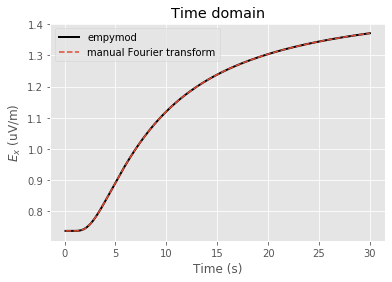

In [7]:
fig = plt.figure()

plt.title('Time domain')
plt.plot(time, tresp2*1e12, 'k', lw=2, label='empymod')
plt.plot(time, tresp*1e12, 'C0--', label='manual Fourier transform')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('$E_x$ (uV/m)')

plt.show()

In [8]:
empymod.Report()

--------------------------------------------------------------------------------
  Date: Wed Sep 11 09:53:20 2019 CEST

             Linux : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
           15.5 GB : RAM
           Jupyter : Environment

  Python 3.7.3 (default, Mar 27 2019, 22:11:17)  [GCC 7.3.0]

            1.16.4 : numpy
             1.3.0 : scipy
             1.8.3 : empymod
             2.6.9 : numexpr
             7.6.0 : IPython
             3.1.0 : matplotlib

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------